In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
XLK = yf.Ticker("XLK")
print(XLK)

yfinance.Ticker object <XLK>


In [3]:
XLK.info

{'previousClose': 136.58,
 'regularMarketOpen': 137.13,
 'twoHundredDayAverage': 121.371315,
 'trailingAnnualDividendYield': 0.0060038073,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 137.3,
 'navPrice': 136.55,
 'averageDailyVolume10Day': 5086842,
 'totalAssets': 37484879872,
 'regularMarketPreviousClose': 136.58,
 'fiftyDayAverage': 131.10667,
 'trailingAnnualDividendRate': 0.82,
 'open': 137.13,
 'toCurrency': None,
 'averageVolume10days': 5086842,
 'expireDate': None,
 'yield': 0.0093,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 135.23,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 4588512,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 6672093,
 'priceToSalesTrailing12Months': None,
 'dayLow': 135.23,
 'ask': 136.3,
 'ytdReturn':

In [4]:
XLK.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-12-22,25.105283,25.177912,24.621093,24.826874,300500,0.0,0
1998-12-23,25.371591,25.420010,24.911609,25.420010,338300,0.0,0
1998-12-24,25.420006,25.420006,25.226330,25.323168,243700,0.0,0
1998-12-28,25.710525,25.710525,25.250544,25.395802,309300,0.0,0
1998-12-29,25.516845,25.577369,25.177911,25.468426,123800,0.0,0
...,...,...,...,...,...,...,...
2021-02-04,134.210007,135.619995,133.820007,135.619995,4067100,0.0,0
2021-02-05,136.029999,136.050003,134.929993,135.320007,4705500,0.0,0
2021-02-08,135.869995,136.800003,135.679993,136.740005,5856600,0.0,0


In [5]:
ETF = 'XLE XLU XLK XLB XLP XLY XLI XLC XLV XLF XLRE'.split()
ETF

['XLE', 'XLU', 'XLK', 'XLB', 'XLP', 'XLY', 'XLI', 'XLC', 'XLV', 'XLF', 'XLRE']

In [6]:
etf_data= yf.download(tickers= ETF, start='2020-02-01', end='2021-02-01')

[*********************100%***********************]  11 of 11 completed


In [42]:
close = etf_data['Close']

copy_c = close.copy()
copy_c = copy_c.reset_index()
copy_c.describe()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,60.719283,57.443227,37.172311,25.257729,75.181634,107.905578,62.293147,35.503745,60.716733,103.679203,136.198645
std,8.690777,7.036258,6.303929,3.104512,10.007432,15.634132,3.997752,2.518856,4.109244,7.786274,20.140682
min,38.349998,40.220001,23.570000,17.660000,48.770000,70.400002,48.630001,25.459999,44.930000,74.620003,87.449997
25%,54.945000,53.545000,32.975000,23.225000,68.189999,96.439999,59.164999,34.595001,58.280001,99.985001,122.805000
50%,61.490002,57.880001,37.060001,24.680000,76.620003,110.430000,63.310001,35.770000,60.630001,104.209999,137.000000
75%,66.315002,63.059999,39.680000,27.835000,84.060001,120.910000,65.364998,36.645000,63.129999,108.264999,152.509995
max,77.480003,70.180000,55.040001,31.459999,90.470001,134.029999,68.150002,41.930000,70.980003,118.500000,170.729996


In [14]:
copy_c['month_year'] = copy_c['Date'].apply(lambda x: x.strftime('%Y-%m'))
m_close = copy_c[['month_year']]
months = m_close['month_year'].unique()
months_labels = months.tolist()

In [21]:
for i, v in enumerate(copy_c.columns):
    print(i,v)

0 Date
1 XLB
2 XLC
3 XLE
4 XLF
5 XLI
6 XLK
7 XLP
8 XLRE
9 XLU
10 XLV
11 XLY
12 month_year


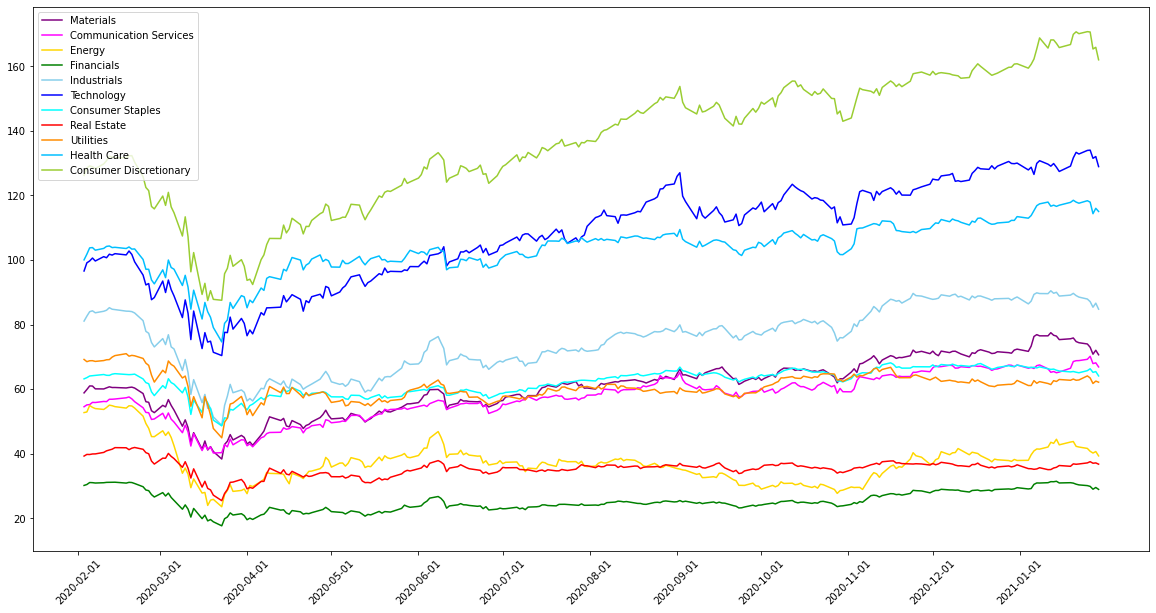

In [39]:
plt.figure(figsize=(20,10))

plt.plot(copy_c['Date'], copy_c['XLB'], color='purple', label='Materials')
plt.plot(copy_c['Date'], copy_c['XLC'], color='magenta', label = 'Communication Services')
plt.plot(copy_c['Date'], copy_c['XLE'], color='gold', label='Energy')
plt.plot(copy_c['Date'], copy_c['XLF'], color='green', label='Financials')
plt.plot(copy_c['Date'], copy_c['XLI'], color='skyblue', label='Industrials')
plt.plot(copy_c['Date'], copy_c['XLK'], color='blue', label='Technology')
plt.plot(copy_c['Date'], copy_c['XLP'], color='aqua', label='Consumer Staples')
plt.plot(copy_c['Date'], copy_c['XLRE'], color='red', label='Real Estate')
plt.plot(copy_c['Date'], copy_c['XLU'], color='darkorange', label='Utilities')
plt.plot(copy_c['Date'], copy_c['XLV'], color='deepskyblue', label='Health Care')
plt.plot(copy_c['Date'], copy_c['XLY'], color='yellowgreen', label='Consumer Discretionary')



plt.legend()
plt.xticks(months_labels, rotation=45)

plt.show()